In [452]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

url = 'clean_airbnb_df_berlin.csv'
df = pd.read_csv(url)

In [453]:
final_df = df

In [454]:
final_df = final_df.drop(['Unnamed: 0'], axis=1)

# X-y Splitt

In [455]:
X = final_df.drop(columns=['Price'])
y = final_df[['Price']]

## Train test split

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

#### MinMaxScaler

In [457]:
# MinMaxScaler X_train
# scaler1 = MinMaxScaler()
# X_train = scaler1.fit_transform(X_train)

In [458]:
# MinMaxScaler X_test
# X_test = scaler1.transform(X_test)

In [459]:
#MinMaxScaler y_train
# scaler2 = MinMaxScaler()
# y_train = scaler1.fit_transform(y_train)

In [460]:
#MinMaxScaler y_test
# y_test = scaler2.transform(y_test)

#### PowerTransform

In [461]:
#PowerTransform X_train
pt1 = PowerTransformer()
X_train = pt1.fit_transform(X_train)

In [462]:
#PowerTransform X_test
X_test = pt1.transform(X_test)

In [463]:
#PowerTransform y_train
pt2 = PowerTransformer()
y_train = pt2.fit_transform(y_train)

In [464]:
#PowerTransform y_test
y_test = pt2.transform(y_test)

#### StandardScaler

In [465]:
# StandardScaler X_train
# scaler1 = StandardScaler()
# X_train = scaler1.fit_transform(X_train)

In [466]:
# StandardScaler X_test
# X_test = scaler1.transform(X_test)

In [467]:
# StandardScaler y_train
# scaler2 = StandardScaler()
# y_train = scaler2.fit_transform(y_train)

In [468]:
# StandardScaler y_test
# y_test = scaler2.transform(y_test)

### Apply linear regression

In [469]:
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [470]:
model.coef_

array([[ 0.01252287, -0.03204156, -0.04826835,  0.01651712,  0.05901988,
        -0.04895188, -0.0709802 , -0.05728034,  0.02616388, -0.01668395,
        -0.06197636, -0.08850501,  0.34159692,  0.08156109,  0.10745286,
         0.0934498 ,  0.23640235,  0.15623927, -0.12628225, -0.04613813,
         0.00692272,  0.07822466, -0.00115147,  0.02965648]])

In [471]:
model.intercept_

array([-1.06428742e-15])

### Create predictions for the test set

In [472]:
y_pred = model.predict(X_test)

In [473]:
# inverse transforming predictions
# pt2.inverse_transform(y_pred)

In [474]:
y_pred = pd.DataFrame(y_pred)

In [475]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [476]:
y_test = y_test.rename(columns={0: 'y_test'})

In [477]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [478]:
residuals_df = residuals_df.rename(columns={0: 'y_pred'})

In [479]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [480]:
residuals_df

,y_test,y_pred,residual
0,0.640387,-0.623575,1.263962
1,-0.891074,-0.920543,0.029469
2,0.174198,-0.056308,0.230506
3,-1.359101,-0.456679,-0.902422
4,-0.328812,0.410463,-0.739275
...,...,...,...
994,-0.697398,-0.303941,-0.393457
995,0.032941,0.242840,-0.209899
996,1.355606,0.996787,0.358819
997,0.278946,0.050317,0.228629


### Calculating metrics

In [481]:
mean_error = residuals_df['residual'].mean()
mean_error

-0.009497376178418188

In [482]:
mse(y_test, y_pred)

0.47050279780248555

In [483]:
np.sqrt(mse(y_test, y_pred))

0.6859320650053368

In [484]:
rmse = mse(y_test, y_pred, squared=False)
rmse

0.6859320650053368

### Computing R2_score for test_set

In [485]:
r2_test = round(r2_score(y_test, y_pred), 3)
r2_test

0.526

### Computing R2_score for train_set

In [486]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.53

### Calculating adjusted R^2

In [487]:
# Calculating adjusted R^2
n = X_train.shape[0]  # Number of observations in the training set
p = X_train.shape[1]  # Number of features used for training
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print(f'Adjusted R2: {adjusted_r2} \n')

Adjusted R2: 0.5221684068710004 



### Plot

In [488]:
features_names = list(X)

In [489]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [490]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)

In [491]:
fi_df = fi_df.sort_values(by='coeff', ascending=False)

<Axes: xlabel='coeff', ylabel='name'>

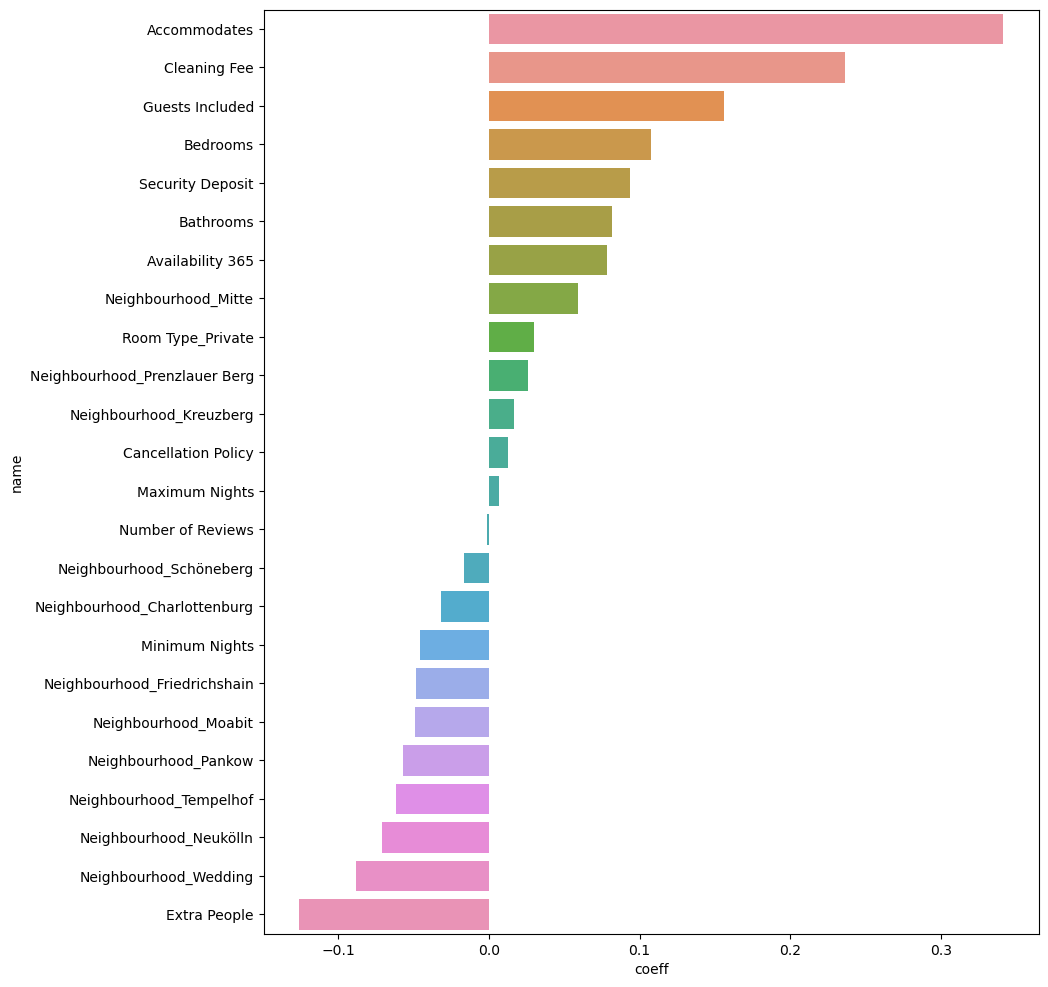

In [492]:
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])